In [1]:
#author: Amelie Bauerdick
#Wabnitz Lab

# Import Packages

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
import sklearn.cluster as cluster
from sklearn.cluster import KMeans 
#from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
import umap
import hdbscan

# Load CSV

In [3]:
data=pd.read_csv("C:/Users/ameli/Documents/Doktorarbeit/Paper/Paper1_IT/Neutrophile/Jupyter/data.csv")
data

,index_file,Area_M01,Area_M02,Area_M03,Area_M04,Area_M05,Area_M06,Area_M07,Area_M08,Area_M09,...,Aspect Ratio Intensity_Inspire(M01 Ch01)_Ch02,Shape Ratio_Inspire(M02 Ch02),Aspect Ratio Intensity_Inspire(M07 Ch07)_Ch07,All,PMN,Singlets,Cytoplasts & PMN,file_number,donor,file_name
0,1,125.777779,64.444443,91.888885,44.111111,3.555556,80.555557,82.666664,50.111111,133.444443,...,0.845722,0.266667,0.715426,1.0,1.0,1.0,0.0,1,1,CNR_GI_11
1,3,106.000000,88.555557,70.666664,17.000000,19.111111,72.444443,75.444443,44.000000,111.888885,...,0.864002,0.142857,0.730149,1.0,1.0,1.0,0.0,1,1,CNR_GI_11
2,4,127.777779,88.777779,105.666664,75.666664,52.777779,122.555557,111.000000,54.555557,139.777771,...,0.894510,0.903226,0.769359,1.0,1.0,0.0,1.0,1,1,CNR_GI_11
3,5,129.000000,91.555557,0.000000,20.777779,12.222222,69.333336,38.333332,23.111111,122.111115,...,0.834003,0.848485,0.953638,1.0,1.0,1.0,0.0,1,1,CNR_GI_11
4,6,131.666672,102.000000,104.333336,82.666664,7.222222,82.222221,59.444443,38.888889,121.666664,...,0.761551,0.722222,0.541753,1.0,1.0,1.0,0.0,1,1,CNR_GI_11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,17523,93.888885,69.000000,81.111115,47.666668,28.444445,73.111115,49.333332,45.222221,102.222221,...,0.853896,0.846154,0.697412,1.0,1.0,1.0,0.0,3,3,SHE_GI_h2o2_10
62996,17525,110.333336,81.333336,69.555557,50.666668,2.000000,84.777779,59.666668,37.777779,110.555557,...,0.933085,0.235294,0.630785,1.0,1.0,1.0,0.0,3,3,SHE_GI_h2o2_10
62997,17526,141.000000,104.555557,100.777779,75.888885,48.333332,122.111115,110.333336,77.666664,147.444443,...,0.936187,0.933333,0.947655,1.0,1.0,0.0,1.0,3,3,SHE_GI_h2o2_10
62998,17528,91.444443,71.888885,64.000000,26.222221,2.000000,67.555557,39.555557,31.666666,85.777779,...,0.906611,0.800000,0.939233,1.0,1.0,1.0,0.0,3,3,SHE_GI_h2o2_10


In [4]:
list(data.columns)

['index_file',
 'Area_M01',
 'Area_M02',
 'Area_M03',
 'Area_M04',
 'Area_M05',
 'Area_M06',
 'Area_M07',
 'Area_M08',
 'Area_M09',
 'Area_M10',
 'Area_M11',
 'Area_M12',
 'Area_MC',
 'Aspect Ratio_M01',
 'Aspect Ratio_M02',
 'Aspect Ratio_M03',
 'Aspect Ratio_M04',
 'Aspect Ratio_M05',
 'Aspect Ratio_M06',
 'Aspect Ratio_M07',
 'Aspect Ratio_M08',
 'Aspect Ratio_M09',
 'Aspect Ratio_M10',
 'Aspect Ratio_M11',
 'Aspect Ratio_M12',
 'Aspect Ratio Intensity_M01_Ch01',
 'Aspect Ratio Intensity_M02_Ch02',
 'Aspect Ratio Intensity_M03_Ch03',
 'Aspect Ratio Intensity_M04_Ch04',
 'Aspect Ratio Intensity_M05_Ch05',
 'Aspect Ratio Intensity_M06_Ch06',
 'Aspect Ratio Intensity_M07_Ch07',
 'Aspect Ratio Intensity_M08_Ch08',
 'Aspect Ratio Intensity_M09_Ch09',
 'Aspect Ratio Intensity_M10_Ch10',
 'Aspect Ratio Intensity_M11_Ch11',
 'Aspect Ratio Intensity_M12_Ch12',
 'Bkgd Mean_Ch01',
 'Bkgd Mean_Ch02',
 'Bkgd Mean_Ch03',
 'Bkgd Mean_Ch04',
 'Bkgd Mean_Ch05',
 'Bkgd Mean_Ch06',
 'Bkgd Mean_Ch07',


# Rename Features

In [5]:
data.columns = data.columns.str.strip().str.replace(' ', '_')
data.columns = data.columns.str.strip().str.replace('&', 'and')
data.columns = data.columns.str.strip().str.replace('+', 'plus')
data.columns = data.columns.str.strip().str.replace('-', 'minus')
list(data.columns)

C:\Users\ameli\AppData\Local\Temp\ipykernel_8684\2204338243.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.strip().str.replace('+', 'plus')


['index_file',
 'Area_M01',
 'Area_M02',
 'Area_M03',
 'Area_M04',
 'Area_M05',
 'Area_M06',
 'Area_M07',
 'Area_M08',
 'Area_M09',
 'Area_M10',
 'Area_M11',
 'Area_M12',
 'Area_MC',
 'Aspect_Ratio_M01',
 'Aspect_Ratio_M02',
 'Aspect_Ratio_M03',
 'Aspect_Ratio_M04',
 'Aspect_Ratio_M05',
 'Aspect_Ratio_M06',
 'Aspect_Ratio_M07',
 'Aspect_Ratio_M08',
 'Aspect_Ratio_M09',
 'Aspect_Ratio_M10',
 'Aspect_Ratio_M11',
 'Aspect_Ratio_M12',
 'Aspect_Ratio_Intensity_M01_Ch01',
 'Aspect_Ratio_Intensity_M02_Ch02',
 'Aspect_Ratio_Intensity_M03_Ch03',
 'Aspect_Ratio_Intensity_M04_Ch04',
 'Aspect_Ratio_Intensity_M05_Ch05',
 'Aspect_Ratio_Intensity_M06_Ch06',
 'Aspect_Ratio_Intensity_M07_Ch07',
 'Aspect_Ratio_Intensity_M08_Ch08',
 'Aspect_Ratio_Intensity_M09_Ch09',
 'Aspect_Ratio_Intensity_M10_Ch10',
 'Aspect_Ratio_Intensity_M11_Ch11',
 'Aspect_Ratio_Intensity_M12_Ch12',
 'Bkgd_Mean_Ch01',
 'Bkgd_Mean_Ch02',
 'Bkgd_Mean_Ch03',
 'Bkgd_Mean_Ch04',
 'Bkgd_Mean_Ch05',
 'Bkgd_Mean_Ch06',
 'Bkgd_Mean_Ch07',


# Temporary Store Selected Features

In [6]:
index_file= data[['index_file']].copy()
names= data[['file_name']].copy()
number= data[['file_number']].copy()
donor= data[['donor']].copy()

Int2= data[['Intensity_MC_Ch02']].copy()
Int3= data[['Intensity_MC_Ch03']].copy()
Int4= data[['Intensity_MC_Ch04']].copy()
Int7= data[['Intensity_MC_Ch07']].copy()
Int11= data[['Intensity_MC_Ch11']].copy()

# Drop Features

In [7]:
data = data.drop(columns=[
 #'Area_M01',
 'Area_M03',
 'Area_M04',  
 'Area_M05',
 'Area_M08',
 'Area_M09',
 'Area_M10',
 'Area_M11',
 'Area_M12',
 'Aspect_Ratio_M03',
 'Aspect_Ratio_M04',
 'Aspect_Ratio_M05',
 'Aspect_Ratio_M08',
 'Aspect_Ratio_M09',
 'Aspect_Ratio_M10',
 'Aspect_Ratio_M11',
 'Aspect_Ratio_M12',
 'Length_M03',
 'Length_M04',
 'Length_M05',
 'Length_M08',
 'Length_M09',  
 'Length_M10',
 'Length_M11',
 'Length_M12',
 'Width_M03',
 'Width_M04',   
 'Width_M05',
 'Width_M08',
 'Width_M09',
 'Width_M10', 
 'Width_M11', 
 'Width_M12',
 'Height_M03',
 'Height_M04', 
 'Height_M05',
 'Height_M08',
 'Height_M09',
 'Height_M10', 
 'Height_M11',  
 'Height_M12',  
 'Aspect_Ratio_Intensity_M01_Ch01',
 'Aspect_Ratio_Intensity_M02_Ch02',
 'Aspect_Ratio_Intensity_M03_Ch03',
 'Aspect_Ratio_Intensity_M04_Ch04',
 'Aspect_Ratio_Intensity_M05_Ch05',
 'Aspect_Ratio_Intensity_M06_Ch06',
 'Aspect_Ratio_Intensity_M07_Ch07',
 'Aspect_Ratio_Intensity_M08_Ch08',
 'Aspect_Ratio_Intensity_M09_Ch09',
 'Aspect_Ratio_Intensity_M10_Ch10',
 'Aspect_Ratio_Intensity_M11_Ch11',
 'Aspect_Ratio_Intensity_M12_Ch12', 
 'Bkgd_Mean_Ch01',
 'Bkgd_Mean_Ch02',
 'Bkgd_Mean_Ch03',
 'Bkgd_Mean_Ch04',
 'Bkgd_Mean_Ch05',
 'Bkgd_Mean_Ch06',
 'Bkgd_Mean_Ch07',
 'Bkgd_Mean_Ch08',
 'Bkgd_Mean_Ch09',
 'Bkgd_Mean_Ch10',
 'Bkgd_Mean_Ch11',
 'Bkgd_Mean_Ch12',
 'Modulation_M01_Ch01',
 'Modulation_M02_Ch02',
 'Modulation_M03_Ch03',
 'Modulation_M04_Ch04',
 'Modulation_M05_Ch05',
 'Modulation_M06_Ch06',
 'Modulation_M07_Ch07',
 'Modulation_M08_Ch08',
 'Modulation_M09_Ch09',
 'Modulation_M10_Ch10',
 'Modulation_M11_Ch11',
 'Modulation_M12_Ch12',
 'Contrast_M01_Ch01',
 'Contrast_M02_Ch02',
 'Contrast_M03_Ch03',
 'Contrast_M04_Ch04',
 'Contrast_M05_Ch05',
 'Contrast_M06_Ch06',
 'Contrast_M07_Ch07',
 'Contrast_M08_Ch08',
 'Contrast_M09_Ch09',
 'Contrast_M10_Ch10',
 'Contrast_M11_Ch11',
 'Contrast_M12_Ch12',
 'Gradient_RMS_M01_Ch01',
 'Gradient_RMS_M02_Ch02',
 'Gradient_RMS_M03_Ch03',
 'Gradient_RMS_M04_Ch04',
 'Gradient_RMS_M05_Ch05',
 'Gradient_RMS_M06_Ch06',
 'Gradient_RMS_M07_Ch07',
 'Gradient_RMS_M08_Ch08',
 'Gradient_RMS_M09_Ch09',
 'Gradient_RMS_M10_Ch10',
 'Gradient_RMS_M11_Ch11',
 'Gradient_RMS_M12_Ch12',
 'Intensity_MC_Ch01',
 'Intensity_MC_Ch05',
 'Intensity_MC_Ch06',
 'Intensity_MC_Ch08',
 'Intensity_MC_Ch12',
 'Intensity_MC_Ch09',
 'Intensity_MC_Ch10',  
 'Mean_Pixel_M01_Ch01',
 'Mean_Pixel_M02_Ch02',
 'Mean_Pixel_M03_Ch03',
 'Mean_Pixel_M04_Ch04',
 'Mean_Pixel_M05_Ch05',
 'Mean_Pixel_M06_Ch06',
 'Mean_Pixel_M07_Ch07',
 'Mean_Pixel_M08_Ch08',
 'Mean_Pixel_M09_Ch09',
 'Mean_Pixel_M10_Ch10',
 'Mean_Pixel_M11_Ch11',
 'Mean_Pixel_M12_Ch12',
 'Median_Pixel_M01_Ch01',
 'Median_Pixel_M02_Ch02',
 'Median_Pixel_M03_Ch03',
 'Median_Pixel_M04_Ch04',
 'Median_Pixel_M05_Ch05',
 'Median_Pixel_M06_Ch06',
 'Median_Pixel_M07_Ch07',
 'Median_Pixel_M08_Ch08',
 'Median_Pixel_M09_Ch09',
 'Median_Pixel_M10_Ch10',
 'Median_Pixel_M11_Ch11',
 'Median_Pixel_M12_Ch12',
 'Max_Pixel_MC_Ch01',
 'Max_Pixel_MC_Ch02',
 'Max_Pixel_MC_Ch03',
 'Max_Pixel_MC_Ch04',
 'Max_Pixel_MC_Ch05',
 'Max_Pixel_MC_Ch06',
 'Max_Pixel_MC_Ch07',
 'Max_Pixel_MC_Ch08',
 'Max_Pixel_MC_Ch09',
 'Max_Pixel_MC_Ch10',
 'Max_Pixel_MC_Ch11',
 'Max_Pixel_MC_Ch12',
 'Raw_Max_Pixel_MC_Ch01',
 'Raw_Max_Pixel_MC_Ch02',
 'Raw_Max_Pixel_MC_Ch03',
 'Raw_Max_Pixel_MC_Ch04',
 'Raw_Max_Pixel_MC_Ch05',
 'Raw_Max_Pixel_MC_Ch06',
 'Raw_Max_Pixel_MC_Ch07',
 'Raw_Max_Pixel_MC_Ch08',
 'Raw_Max_Pixel_MC_Ch09',
 'Raw_Max_Pixel_MC_Ch10',
 'Raw_Max_Pixel_MC_Ch11',
 'Raw_Max_Pixel_MC_Ch12',
 'Raw_Min_Pixel_MC_Ch01',
 'Raw_Min_Pixel_MC_Ch02',
 'Raw_Min_Pixel_MC_Ch03',
 'Raw_Min_Pixel_MC_Ch04',
 'Raw_Min_Pixel_MC_Ch05',
 'Raw_Min_Pixel_MC_Ch06',
 'Raw_Min_Pixel_MC_Ch07',
 'Raw_Min_Pixel_MC_Ch08',
 'Raw_Min_Pixel_MC_Ch09',
 'Raw_Min_Pixel_MC_Ch10',
 'Raw_Min_Pixel_MC_Ch11',
 'Raw_Min_Pixel_MC_Ch12',
 'Saturation_Count_M01_Ch01',
 'Saturation_Count_M02_Ch02',
 'Saturation_Count_M03_Ch03',
 'Saturation_Count_M04_Ch04',
 'Saturation_Count_M05_Ch05',
 'Saturation_Count_M06_Ch06',
 'Saturation_Count_M07_Ch07',
 'Saturation_Count_M08_Ch08',
 'Saturation_Count_M09_Ch09',
 'Saturation_Count_M10_Ch10',
 'Saturation_Count_M11_Ch11',
 'Saturation_Count_M12_Ch12',
 'Saturation_Percent_M01_Ch01',
 'Saturation_Percent_M02_Ch02',
 'Saturation_Percent_M03_Ch03',
 'Saturation_Percent_M04_Ch04',
 'Saturation_Percent_M05_Ch05',
 'Saturation_Percent_M06_Ch06',
 'Saturation_Percent_M07_Ch07',
 'Saturation_Percent_M08_Ch08',
 'Saturation_Percent_M09_Ch09',
 'Saturation_Percent_M10_Ch10',
 'Saturation_Percent_M11_Ch11',
 'Saturation_Percent_M12_Ch12',
 'Bright_Detail_Similarity_R3_MC_Ch03_Ch05',
 'Bright_Detail_Similarity_R3_M01_Ch04_Ch05',
 'Bright_Detail_Colocalization_3_MC_Ch03_Ch04_Ch05',
 'Bright_Detail_Intensity_R3_MC_Ch01',
 'Bright_Detail_Intensity_R3_MC_Ch02',
 'Bright_Detail_Intensity_R3_MC_Ch03',
 'Bright_Detail_Intensity_R3_MC_Ch04',
 'Bright_Detail_Intensity_R3_MC_Ch05',
 'Bright_Detail_Intensity_R3_MC_Ch06',
 'Bright_Detail_Intensity_R3_MC_Ch07',
 'Bright_Detail_Intensity_R3_MC_Ch08',
 'Bright_Detail_Intensity_R3_MC_Ch09',
 'Bright_Detail_Intensity_R3_MC_Ch10',
 'Bright_Detail_Intensity_R3_MC_Ch11',
 'Bright_Detail_Intensity_R3_MC_Ch12',
 'Time',
 'Object_Number',
 'Raw_Centroid_X',
 'Raw_Centroid_Y',
 'Flow_Speed',
 'Max_Pixel_Surface_Ch03',
 'Max_Pixel_Surface_Ch04',
 'Max_Pixel_Surface_Ch11',
 'Max_Pixel_Intracellular_Ch04',
 'Max_Pixel_Surface_Ch04_minus_Max_Pixel_Intracellular_Ch04',
 'Max_Pixel_Surface_Ch04_/_Max_Pixel_Intracellular_Ch04',
 'Internalization_Intracellular_Ch05',
 'Intensity_Surface_Ch04_/_Intensity_MC_Ch04',
 'Intensity_Surface_Ch11_/_Intensity_MC_Ch11',
 'Intensity_MC_Ch11_minus_Bkgd_Mean_Ch11',
 'Bright_Detail_Intensity_R3_Surface_Ch11',
 'Max_Pixel_Surface_Ch03_/_Max_Pixel_MC_Ch03',
 'Intensity_Surface_Ch03',
 'Intensity_Surface_Ch04',
 'Intensity_Surface_Ch05',
 'Intensity_Surface_Ch07',
 'Intensity_Surface_Ch11',
 'Intensity_Cortical_Ch02',
 'Intensity_nuclear_actin',
 'Intensity_Cortical_F_actin',
 'Intensity_Nuclear_f_actin',
 'Bright_Detail_Intensity_R7_M07_Ch07',
 'Aspect_Ratio_Intensity_Inspire(M07__Ch07)_Ch02',
 'Aspect_Ratio_Intensity_Inspire(M01__Ch01)_Ch02',
 'Aspect_Ratio_Intensity_Inspire(M07__Ch07)_Ch07',
 'Bright_Detail_Similarity_R3_MC_Ch04_Ch05',
 'Mean_Pixel_Morphology(M07__Ch07)_Ch07',
 'Area_Inspire(M01__Ch01)_minus_Area_Inspire(M07__Ch07)',
 'Insp_cytoplasm_index',  
 'Bright_Detail_Similarity_R3_MC_Ch03_Ch04',
 'Bright_Detail_Colocalization_3_MC_Ch03_Ch04_Ch06',
 'Bright_Detail_Similarity_R3_MC_Ch03_Ch06',
 'Bright_Detail_Similarity_R3_MC_Ch04_Ch06',   
 'CDD6_on_surface_(%)',
 'Internalization_Intracellular_Ch03',
 'Internalization_Intracellular_Ch04',
 'Internalization_Intracellular_Ch02',
 'Internalization_Intracellular_Ch07',
 'Circularity_Morphology(M07__Ch07)_/_Intensity_Surface_Ch03',
 'Bright_Detail_Similarity_R3_MC_Ch04_Ch11',
 'Internalization_Intracellular_Ch11',
 'Delta_Centroid_XY_MC_Ch01_IntensityWeighted_MC_Ch01',   
 'Area_M01_/_Bright_Detail_Intensity_R7_M07_Ch07',
 'Delta_Centroid_XY_MC_Ch07_IntensityWeighted_MC_Ch07',
 'Contrast_Surface_Ch01',
 'Delta_Centroid_XY_MC_Ch01_M02_Ch02_IntensityWeighted',
 'Area_Component(1__Area__Peak(M07__Ch07__Bright__0)__Descending)',
 'Delta_Centroid_XY_Intesity_Weighted_Actin',
 'H_Variance_Mean_Inspire(M01__Ch01)_Ch02_3',
 'Ensquared_Energy_Ch02_4',
 'H_Entropy_Mean_Inspire(M01__Ch01)_Ch02_3',
 'Area_Threshold(M07__Ch07__40)',
 'Circularity_Threshold(M07__Ch07__40)',
 'Compactness_Threshold(M07__Ch07__40)_Ch07',
 'Diameter_Threshold(M07__Ch07__40)',
 'Elongatedness_Threshold(M07__Ch07__40)',
 'Symmetry_2_Threshold(M07__Ch07__40)_Ch07',
 'Symmetry_3_Threshold(M07__Ch07__40)_Ch07',
 'Circularity_AdaptiveErode(M01__Ch01__95)',
 'Spot_Distance_Min_Threshold(M07__Ch07__40)',
 'Spot_Area_Min_Threshold(M07__Ch07__40)',
 'Area_Inspire(M07__Ch07)',
 'Area_System(M07__Ch07__39)',
 'Area_Inspire(M01__Ch01)',
 'cytoplasmic_size_Insp',
 'Circularity_Inspire(M07__Ch07)',
 'Symmetry_2_Inspire(M01__Ch01)_Ch01',
 'Symmetry_3_Inspire(M01__Ch01)_Ch01',
 'Lobe_Count_Inspire(M01__Ch01)_Ch01',
 'Spot_Count_Inspire(M01__Ch01)_8',
 'Compactness_Inspire(M01__Ch01)_Ch02',
 'Shape_Ratio_Inspire(M07__Ch07)',
 'Aspect_Ratio_Inspire(M07__Ch07)',
 'Aspect_Ratio_Inspire(M01__Ch01)',
 'Shape_Ratio_Inspire(M02__Ch02)',        
 'All',
 'PMN',
 'Singlets',
 'Cytoplasts_and_PMN',
 'donor',
 'file_number',
 'file_name',
 'index_file',
 'Intensity_MC_Ch02',
 'Intensity_MC_Ch03',
 'Intensity_MC_Ch04',
 'Intensity_MC_Ch07',
 'Intensity_MC_Ch11',   
 'Area_Morphology(M01__Ch01)',
 'Area_Morphology(M07__Ch07)'  
 ])

In [8]:
list(data.columns)

['Area_M01',
 'Area_M02',
 'Area_M06',
 'Area_M07',
 'Area_MC',
 'Aspect_Ratio_M01',
 'Aspect_Ratio_M02',
 'Aspect_Ratio_M06',
 'Aspect_Ratio_M07',
 'Length_M01',
 'Length_M02',
 'Length_M06',
 'Length_M07',
 'Width_M01',
 'Width_M02',
 'Width_M06',
 'Width_M07',
 'Height_M01',
 'Height_M02',
 'Height_M06',
 'Height_M07',
 'Circularity_Morphology(M07__Ch07)',
 'Delta_Centroid_XY',
 'Circularity_M01',
 'Diameter_M01',
 'Perimeter_M01',
 'Symmetry_3_M01_Ch07',
 'Ratio_cell/nucleus',
 'Lobe_Count_Morphology(M07__Ch07)_Ch07',
 'Major_Axis_MC',
 'Cytoplasmic_size',
 'Similarity_MC_Ch02_Ch07',
 'Circularity_MC',
 'Major_Axis_M02',
 'Cortical_F_actin_(%)',
 'Nuclear_F_actin',
 'Shape_Ratio_M01',
 'Area_Cytoplasm']

# Normalization

In [9]:
def minmax_norm(df):
  return (df - df.min()) / ( df.max() - df.min())

In [10]:
data= minmax_norm(data)

# DensMAP

In [11]:
reducer = umap.UMAP(densmap=True, 
                    dens_lambda=1, 
                    n_neighbors=20,
                    min_dist=0.5,
                    metric='euclidean')

In [12]:
%time embedding = reducer.fit_transform(data)
embedding.shape

CPU times: total: 5min 31s
Wall time: 1min 46s


(63000, 2)

In [13]:
x = embedding[:, 0]
y =  embedding[:, 1]

In [14]:
data['x']=x
data['y']=y

# Random Forest Regression for DensMAP-1

In [15]:
data1=data.copy()
data1=data1.drop('y',axis=1)

# Split Data

In [16]:
train_df, test_df = train_test_split(data1, test_size=0.2, random_state=42)

# dependent variable -> x
X_train = train_df.drop('x', axis=1)
y_train = train_df['x']
X_test = test_df.drop('x', axis=1)
y_test = test_df['x']

print("length of data for training:", len(X_train))
print("length of data for testing:", len(X_test))

length of data for training: 50400
length of data for testing: 12600


# RandomForestRegressor

In [17]:
# run RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# predict dependent variable
y_pred = model.predict(X_test)

# r²-value calculation
r2 = r2_score(y_test, y_pred)
print("r² Score:", r2)

r² Score: 0.9927591653488108


# Feature Importance

In [18]:
#save importance
importance = model.feature_importances_

# sort features according to importance
s_id = np.argsort(importance)
pos = np.arange(s_id.shape[0])

# MinMax scaling
scaler = MinMaxScaler()
importance_scaled = scaler.fit_transform(importance.reshape(-1, 1)).flatten()

#importance 
total_importance = np.sum(importance_scaled)
percentage_importance = (importance_scaled / total_importance) * 100

# show top ten
top_n = 10
s_id = s_id[-top_n:]
features = pd.DataFrame({'index1': np.array(X_train.columns)[s_id], 'importance_normalized': importance_scaled[s_id], 'percentage_importance': percentage_importance[s_id]})

features

,index1,importance_normalized,percentage_importance
0,Major_Axis_MC,0.002264,0.202126
1,Width_M01,0.003149,0.281088
2,Area_M07,0.003411,0.304487
3,Length_M01,0.004389,0.391773
4,Aspect_Ratio_M01,0.004583,0.409111
5,Area_M01,0.006357,0.567422
6,Diameter_M01,0.007087,0.632620
7,Circularity_M01,0.012283,1.096439
8,Shape_Ratio_M01,0.062438,5.573449
9,Lobe_Count_Morphology(M07__Ch07)_Ch07,1.000000,89.264201


# Plot Feature Importance

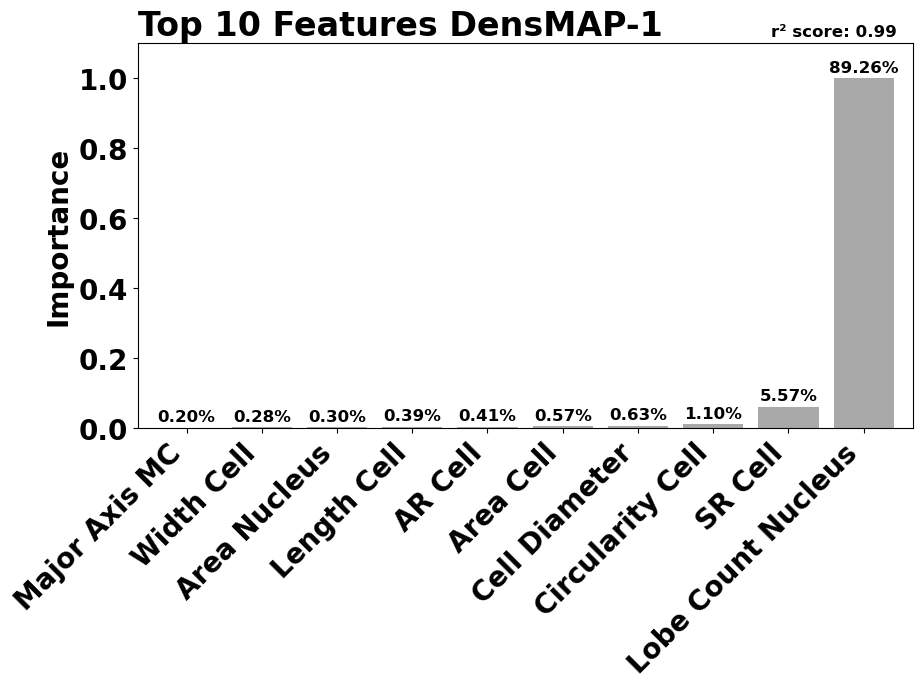

In [19]:
# rename features
row_labels = {
    'Area_M01': 'Area Cell',
    'Area_Morphology(M01__Ch01)': 'Area Cell',
    'Diameter_M01': 'Cell Diameter',
    'Width_M01':'Width Cell',
    'Length_M01': 'Length Cell',
    'Height_M01': 'Height Cell',
    'Aspect_Ratio_M01': 'AR Cell',
    'Shape_Ratio_M01':'SR Cell',
    'Circularity_M01':'Circularity Cell',
    'Circularity_AdaptiveErode(M01__Ch01__95)': 'Circularity Cell',
    'Perimeter_M01':'Perimeter Cell',
    
    'Cytoplasmic_size': 'Cytoplasmic Size',
    'Area_Cytoplasm': 'Area Cytoplasm',
    'Area_MC': 'Area MC',
    'Circularity_MC':'Circularity MC',
    'Major_Axis_MC':'Major Axis MC',
    
    'Height_M02': 'Height F-Actin',
    'Length_M02': 'Length F-Actin',
    'Area_Morphology(M07__Ch07)': 'Area Nucleus',
    'Length_M07': 'Length Nucleus',
    'Height_M07': 'Height Nucleus',
    'Shape_Ratio_Morphology(M07__Ch07)': 'SR Nucleus',
    'Circularity_Morphology(M07__Ch07)': 'Circularity Nucleus',
    'Area_M07': 'Area Nucleus',
    'Aspect_Ratio_M07': 'AR Nucleus',
    'Lobe_Count_Morphology(M07__Ch07)_Ch07':'Lobe Count Nucleus'
}

features['index1'] = features['index1'].map(row_labels)

ax = features.plot.bar(x='index1', y='importance_normalized', color='darkgray', legend=False, figsize=(10,5), width=0.8, fontsize=20)
plt.xlabel('')
plt.ylabel('Importance', fontsize=20)

# position percentage values
for i, v in enumerate(features['percentage_importance']):
    if features['importance_normalized'][i] + 0.01 > 1.1:
        text_height = 1
    else:
        text_height = features['importance_normalized'][i] + 0.01
    ax.text(i, text_height, f'{v:.2f}%', ha='center', va='bottom', fontsize=12, color='black')

# add r2 score
plt.title(f'Top 10 Features DensMAP-1', fontsize=24, loc='left')
plt.text(0.98, 1.03, f'r² score: {r2:.2f}', horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, fontsize=12, fontweight='normal')
plt.ylim(0, 1.1) 
plt.xticks(rotation=45, ha='right')

plt.savefig('png/TTDensMAP1.png', dpi=300, bbox_inches = 'tight')

plt.show()

# Random Forest Regression for DensMAP-2

In [20]:
data2=data.copy()
data2=data2.drop('x',axis=1)

# Split Data

In [21]:
train_df, test_df = train_test_split(data2, test_size=0.2, random_state=42)

# dependent variable -> y
X_train = train_df.drop('y', axis=1)
y_train = train_df['y']
X_test = test_df.drop('y', axis=1)
y_test = test_df['y']

print("length of data for training:", len(X_train))
print("length of data for testing:", len(X_test))

length of data for training: 50400
length of data for testing: 12600


# RandomForestRegressor

In [22]:
# run RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# predict dependent variable
y_pred = model.predict(X_test)

# r²-value calculation
r2 = r2_score(y_test, y_pred)
print("r² score:", r2)

r² score: 0.9937178493454768


# Feature Importance

In [23]:
#save importance
importance = model.feature_importances_

# sort features according to importance
s_id = np.argsort(importance)
pos = np.arange(s_id.shape[0])

# MinMax scaling
scaler = MinMaxScaler()
importance_scaled = scaler.fit_transform(importance.reshape(-1, 1)).flatten()

#importance 
total_importance = np.sum(importance_scaled)
percentage_importance = (importance_scaled / total_importance) * 100

# show top ten
top_n = 10
s_id = s_id[-top_n:]
features = pd.DataFrame({'index1': np.array(X_train.columns)[s_id], 'importance_normalized': importance_scaled[s_id], 'percentage_importance': percentage_importance[s_id]})

features

,index1,importance_normalized,percentage_importance
0,Area_Cytoplasm,0.001696,0.142979
1,Circularity_MC,0.001719,0.144939
2,Length_M07,0.002504,0.211083
3,Aspect_Ratio_M07,0.003727,0.314189
4,Width_M01,0.003881,0.327216
5,Length_M01,0.004353,0.367008
6,Major_Axis_MC,0.020336,1.714479
7,Circularity_M01,0.022697,1.913504
8,Shape_Ratio_M01,0.111377,9.389734
9,Lobe_Count_Morphology(M07__Ch07)_Ch07,1.000000,84.305963


# Plot Feature Importance

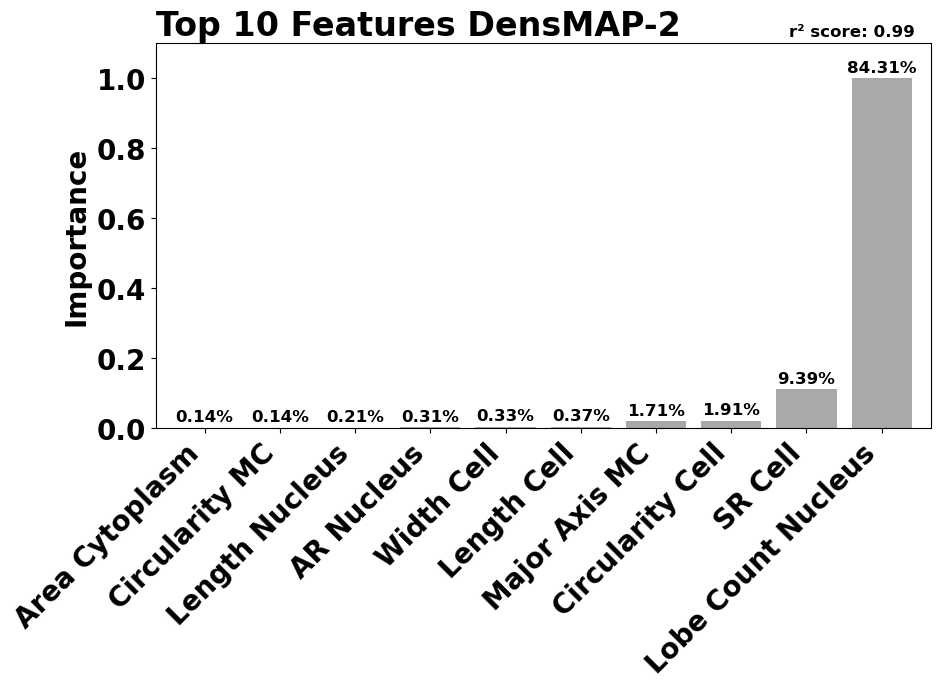

In [24]:
# rename features
row_labels = {
    'Area_M01': 'Area Cell',
    'Area_Morphology(M01__Ch01)': 'Area Cell',
    'Diameter_M01': 'Cell Diameter',
    'Width_M01':'Width Cell',
    'Length_M01': 'Length Cell',
    'Height_M01': 'Height Cell',
    'Aspect_Ratio_M01': 'AR Cell',
    'Shape_Ratio_M01':'SR Cell',
    'Perimeter_M01':'Perimeter Cell',
    'Circularity_M01':'Circularity Cell',
    'Circularity_AdaptiveErode(M01__Ch01__95)': 'Circularity Cell',
    
    'Cytoplasmic_size': 'Cytoplasmic Size',
    'Area_Cytoplasm': 'Area Cytoplasm',
    'Area_MC': 'Area MC',
    'Circularity_MC':'Circularity MC',
    'Major_Axis_MC':'Major Axis MC', 
    
    'Height_M02': 'Height F-Actin',
    'Length_M02': 'Length F-Actin',
    'Width_M02':'Width F-Actin',
    
    'Area_Morphology(M07__Ch07)': 'Area Nucleus',
    'Length_M07': 'Length Nucleus',
    'Height_M07': 'Height Nucleus',
    'Shape_Ratio_Morphology(M07__Ch07)': 'SR Nucleus',
    'Circularity_Morphology(M07__Ch07)': 'Circularity Nucleus',
    'Area_M07': 'Area Nucleus',
    'Aspect_Ratio_M07': 'AR Nucleus',
    'Lobe_Count_Morphology(M07__Ch07)_Ch07':'Lobe Count Nucleus'
}

features['index1'] = features['index1'].map(row_labels)

ax = features.plot.bar(x='index1', y='importance_normalized', color='darkgray', legend=False, figsize=(10,5), width=0.8, fontsize=20)
plt.xlabel('')
plt.ylabel('Importance', fontsize=20)

# position percentage values
for i, v in enumerate(features['percentage_importance']):
    if features['importance_normalized'][i] + 0.01 > 1.1:
        text_height = 1
    else:
        text_height = features['importance_normalized'][i] + 0.01
    ax.text(i, text_height, f'{v:.2f}%', ha='center', va='bottom', fontsize=12, color='black')

# add r2 score
plt.title(f'Top 10 Features DensMAP-2', fontsize=24, loc='left')
plt.text(0.98, 1.03, f'r² score: {r2:.2f}', horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, fontsize=12, fontweight='normal')
plt.ylim(0, 1.1) 
plt.xticks(rotation=45, ha='right')

plt.savefig('png/TTDensMAP2.png', dpi=300, bbox_inches = 'tight')

plt.show()

# Concatenate Features

In [25]:
frames=[data,names,index_file,donor,number,Int2,Int3,Int4,Int7,Int11]
data=pd.concat(frames, axis=1)
data

,Area_M01,Area_M02,Area_M06,Area_M07,Area_MC,Aspect_Ratio_M01,Aspect_Ratio_M02,Aspect_Ratio_M06,Aspect_Ratio_M07,Length_M01,...,y,file_name,index_file,donor,file_number,Intensity_MC_Ch02,Intensity_MC_Ch03,Intensity_MC_Ch04,Intensity_MC_Ch07,Intensity_MC_Ch11
0,0.342516,0.164913,0.193473,0.212997,0.157543,0.935770,0.895592,0.742653,0.828787,0.160920,...,3.202184,CNR_GI_11,1,1,1,10592.503906,10829.438477,5573.332031,52029.429688,1970.516357
1,0.250000,0.226614,0.172203,0.194389,0.116379,0.899479,0.927894,0.797395,0.843540,0.137931,...,-2.001893,CNR_GI_11,3,1,1,21277.480469,4794.350586,5100.957520,57998.902344,4766.680664
2,0.351871,0.227182,0.303613,0.286001,0.187716,0.916088,0.912654,0.740706,0.853506,0.160920,...,9.517039,CNR_GI_11,4,1,1,56849.820312,10702.029297,11052.336914,23129.652344,23753.763672
3,0.357588,0.234291,0.164044,0.098769,0.146121,0.911297,0.945467,0.568358,0.966592,0.160920,...,12.132422,CNR_GI_11,5,1,1,86099.359375,3457.183838,4277.188965,53895.714844,28729.251953
4,0.370062,0.261018,0.197844,0.153163,0.158621,0.681898,0.778701,0.983908,0.704950,0.229885,...,1.915740,CNR_GI_11,6,1,1,37848.769531,31435.689453,14425.722656,66010.875000,28717.539062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,0.193347,0.176571,0.173951,0.127111,0.096767,0.914403,0.953054,0.695463,0.851317,0.103448,...,4.255477,SHE_GI_h2o2_10,17523,3,3,26087.253906,10660.279297,7312.406738,50993.730469,3459.491455
62996,0.270270,0.208132,0.204545,0.153736,0.129310,0.875433,0.899321,0.664939,0.770080,0.149425,...,17.289040,SHE_GI_h2o2_10,17525,3,3,9874.682617,31397.998047,14638.154297,58063.457031,4818.807129
62997,0.413721,0.267558,0.302448,0.284283,0.193534,0.948950,0.938887,0.811283,0.923806,0.195402,...,10.001140,SHE_GI_h2o2_10,17526,3,3,29239.488281,9218.439453,13230.167969,38974.808594,37365.039062
62998,0.181913,0.183964,0.159382,0.101918,0.073491,0.946111,0.921682,0.770323,0.918921,0.080460,...,13.648517,SHE_GI_h2o2_10,17528,3,3,8336.823242,4749.646973,4774.823730,51944.234375,16201.823242


# DensMAP

In [26]:
data.to_csv("C:/Users/ameli/Documents/Doktorarbeit/Paper/Paper1_IT/Neutrophile/Jupyter/data2_gesamt.csv",index=False)